In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv


In [2]:
df = pd.read_csv('/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
df.describe(include=['O'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
for column in df.select_dtypes(include=['O']).columns:
    print(f'column name : {column}\ncolumn values : {df[column].unique()}\n')

column name : Gender
column values : ['Female' 'Male']

column name : family_history_with_overweight
column values : ['yes' 'no']

column name : FAVC
column values : ['no' 'yes']

column name : CAEC
column values : ['Sometimes' 'Frequently' 'Always' 'no']

column name : SMOKE
column values : ['no' 'yes']

column name : SCC
column values : ['no' 'yes']

column name : CALC
column values : ['no' 'Sometimes' 'Frequently' 'Always']

column name : MTRANS
column values : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

column name : NObeyesdad
column values : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']



In [8]:
duplicated = df[df.duplicated(keep='first')]
print(len(duplicated))

24


In [9]:
df = df.drop_duplicates()
df[df.duplicated(keep='first')]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [10]:
new_target = {'Normal_Weight' : 1, 'Overweight_Level_I' : 2, 'Overweight_Level_II' : 3, 'Obesity_Type_I' : 4, 'Insufficient_Weight' : 0, 'Obesity_Type_II' : 5, 'Obesity_Type_III' : 6}

df['target'] = df['NObeyesdad'].map(new_target)
df[['target','NObeyesdad']]

,target,NObeyesdad
0,1,Normal_Weight
1,1,Normal_Weight
2,1,Normal_Weight
3,2,Overweight_Level_I
4,3,Overweight_Level_II
...,...,...
2106,6,Obesity_Type_III
2107,6,Obesity_Type_III
2108,6,Obesity_Type_III
2109,6,Obesity_Type_III


In [11]:
df = df.drop('NObeyesdad', axis=1)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,target
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,1
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,1
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,1
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,2
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,6
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,6
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,6
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,6


<Axes: >

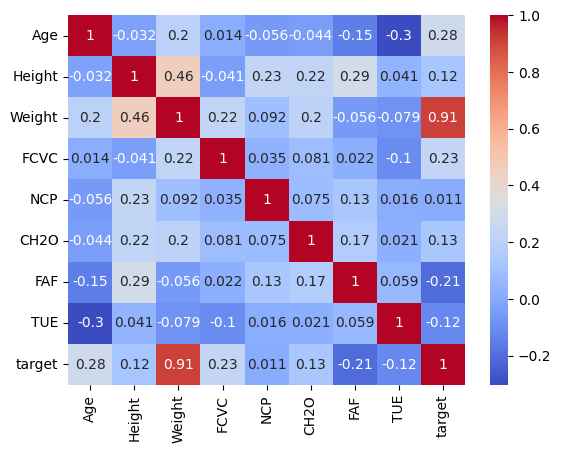

In [12]:
import seaborn as sns

correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

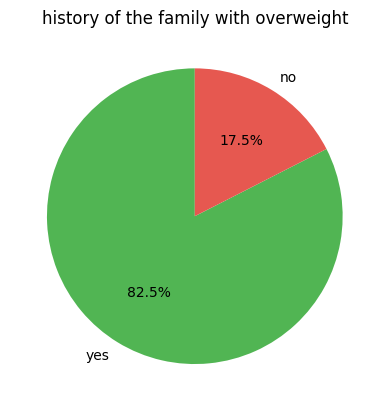

In [13]:
import matplotlib.pyplot as plt


plt.pie(df['family_history_with_overweight'].value_counts(),labels=df['family_history_with_overweight'].value_counts().index, autopct='%1.1f%%', colors=['#51b553', '#e65850'],startangle = 90)
plt.title('history of the family with overweight')
plt.show()

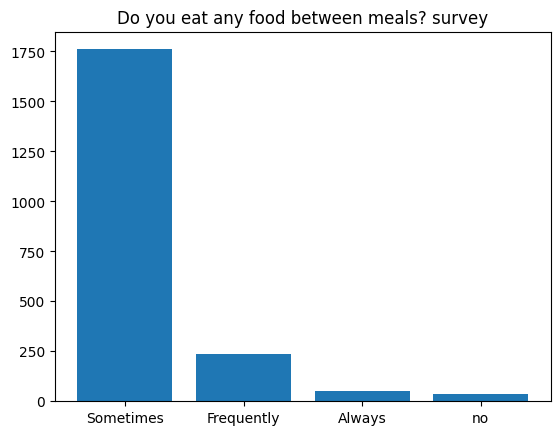

In [14]:
plt.bar(df['CAEC'].value_counts().index, df['CAEC'].value_counts())
plt.title('Do you eat any food between meals? survey')
plt.show()

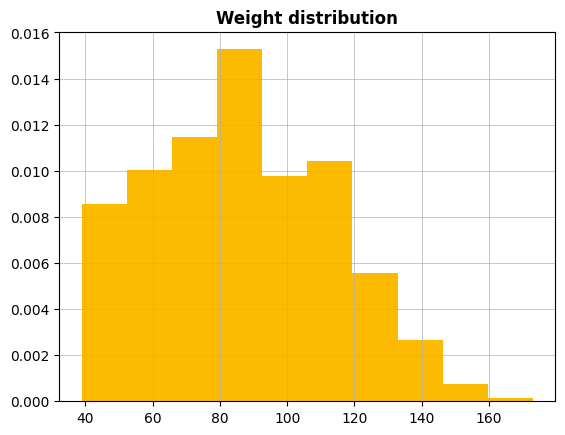

In [15]:
plt.hist(df['Weight'], density=True ,color='#fcba03')
plt.title('Weight distribution', fontweight='bold')
plt.grid(linewidth = 0.5)
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

d_types = dict(df.dtypes)

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        df[name] = Le.fit_transform(df[name])

In [17]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,target
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,2
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,3


In [18]:
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop('target', axis=1)



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(X_train.shape)
print(X_test.shape)

(1669, 16)
(418, 16)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

model = RandomForestClassifier(n_estimators=150)
rfecv = RFECV(model, step = 1, min_features_to_select= 4, n_jobs=-1)
rfecv.fit(X_train, y_train)

RFECV(estimator=RandomForestClassifier(n_estimators=150),
      min_features_to_select=4, n_jobs=-1)

In [21]:
rfecv.support_

array([False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False])

In [22]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'target'],
      dtype='object')

In [23]:
selected_features = pd.DataFrame({'column' : X_train.columns, 'Selected?' : rfecv.support_})
selected_features

,column,Selected?
0,Gender,False
1,Age,True
2,Height,True
3,Weight,True
4,family_history_with_overweight,False
5,FAVC,False
6,FCVC,True
7,NCP,False
8,CAEC,False
9,SMOKE,False


In [24]:
selected = np.where(rfecv.support_)[0]
X_train = X_train.iloc[:, selected]
X_test = X_test.iloc[:, selected]

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [26]:
from sklearn.metrics import accuracy_score

predicted = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predicted):.1%}')

Accuracy: 97.4%


In [27]:
reverse_mapping = {v:k for k, v in new_target.items()}
reverse_mapping

{1: 'Normal_Weight',
 2: 'Overweight_Level_I',
 3: 'Overweight_Level_II',
 4: 'Obesity_Type_I',
 0: 'Insufficient_Weight',
 5: 'Obesity_Type_II',
 6: 'Obesity_Type_III'}

In [28]:
predictions = pd.Series(predicted)
predictions = predictions.map(reverse_mapping)

In [29]:
predictions

0      Overweight_Level_II
1           Obesity_Type_I
2         Obesity_Type_III
3          Obesity_Type_II
4      Insufficient_Weight
              ...         
413          Normal_Weight
414    Insufficient_Weight
415         Obesity_Type_I
416    Overweight_Level_II
417     Overweight_Level_I
Length: 418, dtype: object

In [30]:
y_test = pd.Series(y_test)
y_test = y_test.map(reverse_mapping)

In [31]:
result = pd.DataFrame({'Actual' : np.array(y_test), 'Predicted' : np.array(predictions)})
result

,Actual,Predicted
0,Overweight_Level_II,Overweight_Level_II
1,Obesity_Type_I,Obesity_Type_I
2,Obesity_Type_III,Obesity_Type_III
3,Obesity_Type_II,Obesity_Type_II
4,Insufficient_Weight,Insufficient_Weight
...,...,...
413,Normal_Weight,Normal_Weight
414,Normal_Weight,Insufficient_Weight
415,Obesity_Type_I,Obesity_Type_I
416,Overweight_Level_II,Overweight_Level_II


In [32]:
result[~result.duplicated()]

,Actual,Predicted
0,Overweight_Level_II,Overweight_Level_II
1,Obesity_Type_I,Obesity_Type_I
2,Obesity_Type_III,Obesity_Type_III
3,Obesity_Type_II,Obesity_Type_II
4,Insufficient_Weight,Insufficient_Weight
5,Normal_Weight,Normal_Weight
6,Overweight_Level_I,Overweight_Level_I
35,Normal_Weight,Insufficient_Weight
85,Normal_Weight,Overweight_Level_I
159,Insufficient_Weight,Normal_Weight
